In [200]:
%%time

import numpy as np
import pandas as pd
import seaborn as sb
from scipy import stats
import matplotlib.pyplot as plt
display(pd.__version__)


chi = pd.read_csv("chi.csv")

chi.info()
chi

'1.2.4'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5755039 entries, 0 to 5755038
Data columns (total 9 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Date                  object
 1   Primary Type          object
 2   Location Description  object
 3   Arrest                bool  
 4   Beat                  int64 
 5   District              int64 
 6   Ward                  int64 
 7   Community Area        int64 
 8   Year                  int64 
dtypes: bool(1), int64(5), object(3)
memory usage: 356.7+ MB
Wall time: 10.4 s


,Date,Primary Type,Location Description,Arrest,Beat,District,Ward,Community Area,Year
0,07/26/2001 06:00:00 PM,MOTOR VEHICLE THEFT,STREET,False,723,7,16,68,2001
1,09/02/2001 06:00:00 PM,DECEPTIVE PRACTICE,PARK PROPERTY,False,932,9,16,61,2001
2,08/17/2001 05:30:00 AM,MOTOR VEHICLE THEFT,STREET,False,821,8,14,58,2001
3,07/09/2001 04:30:00 PM,DECEPTIVE PRACTICE,CURRENCY EXCHANGE,True,1623,16,45,11,2001
4,08/15/2001 11:30:00 PM,BURGLARY,RESTAURANT,True,1925,19,46,6,2001
...,...,...,...,...,...,...,...,...,...
5755034,01/18/2021 05:45:00 PM,DECEPTIVE PRACTICE,RESIDENCE,False,1111,11,37,23,2021
5755035,01/18/2021 10:17:00 AM,THEFT,OTHER (SPECIFY),False,2221,22,21,73,2021
5755036,01/18/2021 09:30:00 PM,ROBBERY,SIDEWALK,False,1211,12,1,24,2021
5755037,01/18/2021 01:04:00 AM,OTHER OFFENSE,STREET,True,131,1,3,33,2021


In [201]:
%%time

chi.info()
chi.pop('Date')
chi.pop('Location Description')
chi.pop('District')
chi.pop('Ward')
chi.pop('Community Area')
chi.pop('Year')

chi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5755039 entries, 0 to 5755038
Data columns (total 9 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Date                  object
 1   Primary Type          object
 2   Location Description  object
 3   Arrest                bool  
 4   Beat                  int64 
 5   District              int64 
 6   Ward                  int64 
 7   Community Area        int64 
 8   Year                  int64 
dtypes: bool(1), int64(5), object(3)
memory usage: 356.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5755039 entries, 0 to 5755038
Data columns (total 3 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   Primary Type  object
 1   Arrest        bool  
 2   Beat          int64 
dtypes: bool(1), int64(1), object(1)
memory usage: 93.3+ MB
Wall time: 536 ms


In [202]:
%%time

print(chi['Primary Type'].unique())
print(chi.nunique())

['MOTOR VEHICLE THEFT' 'DECEPTIVE PRACTICE' 'BURGLARY' 'HOMICIDE'
 'SEX OFFENSE' 'OFFENSE INVOLVING CHILDREN' 'CRIMINAL TRESPASS' 'BATTERY'
 'ROBBERY' 'THEFT' 'CRIM SEXUAL ASSAULT' 'OTHER OFFENSE' 'CRIMINAL DAMAGE'
 'ASSAULT' 'INTIMIDATION' 'WEAPONS VIOLATION' 'ARSON'
 'PUBLIC PEACE VIOLATION' 'CRIMINAL SEXUAL ASSAULT' 'NARCOTICS'
 'PROSTITUTION' 'LIQUOR LAW VIOLATION' 'GAMBLING' 'KIDNAPPING'
 'INTERFERENCE WITH PUBLIC OFFICER' 'STALKING' 'RITUALISM' 'OBSCENITY'
 'PUBLIC INDECENCY' 'OTHER NARCOTIC VIOLATION' 'NON-CRIMINAL'
 'NON-CRIMINAL (SUBJECT SPECIFIED)' 'HUMAN TRAFFICKING' 'NON - CRIMINAL'
 'CONCEALED CARRY LICENSE VIOLATION']
Primary Type     35
Arrest            2
Beat            303
dtype: int64
Wall time: 2.08 s


In [203]:
%%time

# NON-CRIMINAL (SUBJECT SPECIFIED)     1.000000

# 'Primary Type'  get_grouper(obj, key, axis, level, sort, observed, mutated, validate)
# gk = df.groupby('Column')    gk.get_group('Index')

gk = chi.groupby('Primary Type')    
gk1 = gk.get_group('NON-CRIMINAL')

display(gk.get_group('NON-CRIMINAL'))
# display(gk.get_group('NON-CRIMINAL (SUBJECT SPECIFIED)')['Arrest'].mean())



gb1 = pd.DataFrame(gk.get_group('NON-CRIMINAL')['Arrest'].mean(), 
                  index=['Infractions'],
                  columns=['Proportion of Arrests Made Since 2001'])

gb1.info()
gb1


,Primary Type,Arrest,Beat
734566,NON-CRIMINAL,False,2511
2820856,NON-CRIMINAL,False,1034
3194378,NON-CRIMINAL,False,2024
3790140,NON-CRIMINAL,True,1651
3863632,NON-CRIMINAL,False,122
...,...,...,...
5458509,NON-CRIMINAL,True,321
5512681,NON-CRIMINAL,False,823
5551612,NON-CRIMINAL,False,2521
5685457,NON-CRIMINAL,False,1513


<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Infractions to Infractions
Data columns (total 1 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Proportion of Arrests Made Since 2001  1 non-null      float64
dtypes: float64(1)
memory usage: 16.0+ bytes
Wall time: 1.12 s


,Proportion of Arrests Made Since 2001
Infractions,0.05848


In [204]:
%%time

# NON-CRIMINAL (SUBJECT SPECIFIED)     1.000000

# 'Primary Type'  get_grouper(obj, key, axis, level, sort, observed, mutated, validate)
# gk = df.groupby('Column')    gk.get_group('Index')

gk = chi.groupby('Primary Type')    
gk2 = gk.get_group('NON - CRIMINAL')
display(gk.get_group('NON - CRIMINAL'))
# display(gk.get_group('NON-CRIMINAL (SUBJECT SPECIFIED)')['Arrest'].mean())



gb2 = pd.DataFrame(gk.get_group('NON - CRIMINAL')['Arrest'].mean(), 
                  index=['Infractions'],
                  columns=['Proportion of Arrests Made Since 2001'])

gb2.info()
gb2

,Primary Type,Arrest,Beat
4010213,NON - CRIMINAL,False,1221
4039167,NON - CRIMINAL,False,434
4067812,NON - CRIMINAL,False,531
4272350,NON - CRIMINAL,False,1034
4330549,NON - CRIMINAL,False,1033
4359509,NON - CRIMINAL,False,823
4376335,NON - CRIMINAL,False,1622
4383682,NON - CRIMINAL,False,831
4387996,NON - CRIMINAL,False,832
4407224,NON - CRIMINAL,False,513


<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Infractions to Infractions
Data columns (total 1 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Proportion of Arrests Made Since 2001  1 non-null      float64
dtypes: float64(1)
memory usage: 16.0+ bytes
Wall time: 1.27 s


,Proportion of Arrests Made Since 2001
Infractions,0.157895


In [205]:
%%time

gk3 = gk1.append(gk2) #, ignore_index = True)

fmg = gb1.append(gb2) #, ignore_index = True)

display(fmg.mean())
display(fmg.info())
display(fmg)
display(gk3.info())
display(gk3)

Proportion of Arrests Made Since 2001    0.108187
dtype: float64

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Infractions to Infractions
Data columns (total 1 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Proportion of Arrests Made Since 2001  2 non-null      float64
dtypes: float64(1)
memory usage: 32.0+ bytes


None

,Proportion of Arrests Made Since 2001
Infractions,0.058480
Infractions,0.157895


<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 734566 to 4849637
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Primary Type  209 non-null    object
 1   Arrest        209 non-null    bool  
 2   Beat          209 non-null    int64 
dtypes: bool(1), int64(1), object(1)
memory usage: 5.1+ KB


None

,Primary Type,Arrest,Beat
734566,NON-CRIMINAL,False,2511
2820856,NON-CRIMINAL,False,1034
3194378,NON-CRIMINAL,False,2024
3790140,NON-CRIMINAL,True,1651
3863632,NON-CRIMINAL,False,122
...,...,...,...
4833079,NON - CRIMINAL,False,124
4837550,NON - CRIMINAL,False,1131
4838500,NON - CRIMINAL,True,913
4847813,NON - CRIMINAL,True,1221


Wall time: 72 ms


In [209]:
%%time 

gk3['Primary Type'] = gk3['Primary Type'].replace(['NON - CRIMINAL'], 'NON-CRIMINAL')

gk3

Wall time: 3.02 ms


,Primary Type,Arrest,Beat
734566,NON-CRIMINAL,False,2511
2820856,NON-CRIMINAL,False,1034
3194378,NON-CRIMINAL,False,2024
3790140,NON-CRIMINAL,True,1651
3863632,NON-CRIMINAL,False,122
...,...,...,...
4833079,NON-CRIMINAL,False,124
4837550,NON-CRIMINAL,False,1131
4838500,NON-CRIMINAL,True,913
4847813,NON-CRIMINAL,True,1221


In [210]:
%%time

fmi2 = pd.DataFrame(gk3.groupby('Primary Type')['Arrest'].mean().to_numpy(), 
                  index=['Infractions'],
                  columns=['Proportion of Arrests Made Since 2001'])
fmi2.info()
fmi2

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Infractions to Infractions
Data columns (total 1 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Proportion of Arrests Made Since 2001  1 non-null      float64
dtypes: float64(1)
memory usage: 16.0+ bytes
Wall time: 17 ms


,Proportion of Arrests Made Since 2001
Infractions,0.076555


In [188]:
%%time

fmi = pd.DataFrame(0.108187, 
                  index=['Infractions'],
                  columns=['Proportion of Arrests Made Since 2001'])

fmi.info()
fmi

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Infractions to Infractions
Data columns (total 1 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Proportion of Arrests Made Since 2001  1 non-null      float64
dtypes: float64(1)
memory usage: 16.0+ bytes
Wall time: 13 ms


,Proportion of Arrests Made Since 2001
Infractions,0.108187


In [211]:
%%time

# display(gk.get_group('NON-CRIMINAL (SUBJECT SPECIFIED)')['Arrest'].mean())



fms = pd.DataFrame(gk.get_group('NON-CRIMINAL (SUBJECT SPECIFIED)')['Arrest'].mean(), 
                  index=['Hypothetical Comparison Arrest Rate of 100%'],
                  columns=['Proportion of Arrests Made Since 2001'])

fm2 = fmi2.append(fms) #, ignore_index = True)

fm2.info()
fm2

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Infractions to Hypothetical Comparison Arrest Rate of 100%
Data columns (total 1 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Proportion of Arrests Made Since 2001  2 non-null      float64
dtypes: float64(1)
memory usage: 32.0+ bytes
Wall time: 16 ms


,Proportion of Arrests Made Since 2001
Infractions,0.076555
Hypothetical Comparison Arrest Rate of 100%,1.000000


In [217]:
%%time

chi['Primary Type'] = chi['Primary Type'].replace(['MOTOR VEHICLE THEFT','BURGLARY','HOMICIDE',
 'SEX OFFENSE','OFFENSE INVOLVING CHILDREN','ROBBERY','THEFT','CRIM SEXUAL ASSAULT','INTIMIDATION',
 'ARSON','CRIMINAL SEXUAL ASSAULT','NARCOTICS','KIDNAPPING','STALKING','RITUALISM',
 'OTHER NARCOTIC VIOLATION','HUMAN TRAFFICKING'], 1)

chi['Primary Type'] = chi['Primary Type'].replace(['DECEPTIVE PRACTICE','CRIMINAL TRESPASS','BATTERY',
 'OTHER OFFENSE','CRIMINAL DAMAGE','ASSAULT','WEAPONS VIOLATION','PUBLIC PEACE VIOLATION',
 'PROSTITUTION','LIQUOR LAW VIOLATION','GAMBLING','INTERFERENCE WITH PUBLIC OFFICER','OBSCENITY',
 'PUBLIC INDECENCY','CONCEALED CARRY LICENSE VIOLATION'], 2) 

# 'NON-CRIMINAL','NON-CRIMINAL (SUBJECT SPECIFIED)','NON - CRIMINAL',

chi['Primary Type'] = chi['Primary Type'].replace(['NON-CRIMINAL','NON-CRIMINAL (SUBJECT SPECIFIED)',
                                                   'NON - CRIMINAL',], None)

print(chi['Primary Type'].unique())
print(chi.nunique())

[1 2]
Primary Type      2
Arrest            2
Beat            303
dtype: int64
Wall time: 11.5 s


In [218]:
%%time

print(chi['Arrest'].unique())

# chi['Arrest'] = chi['Arrest'].replace(['False'], 0)
# chi['Arrest'] = chi['Arrest'].replace(['True'], 1)
# chi['Arrest'] = chi['Arrest'].astype(int)
chi = chi.astype(int)

print(chi['Arrest'].unique())
print(chi.nunique())
print(chi.info())

[False  True]
[0 1]
Primary Type      2
Arrest            2
Beat            303
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5755039 entries, 0 to 5755038
Data columns (total 3 columns):
 #   Column        Dtype
---  ------        -----
 0   Primary Type  int32
 1   Arrest        int32
 2   Beat          int32
dtypes: int32(3)
memory usage: 65.9 MB
None
Wall time: 1.21 s


In [179]:
%%time

chi.groupby('Primary Type')['Arrest'].mean()

# misdemeanors=2 slightly outperform felonies=1 in regards to avoiding arrest (0=F, 1=T for arrest made)

Wall time: 413 ms


Primary Type
1    0.297819
2    0.260754
Name: Arrest, dtype: float64

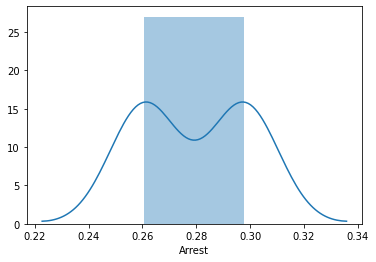

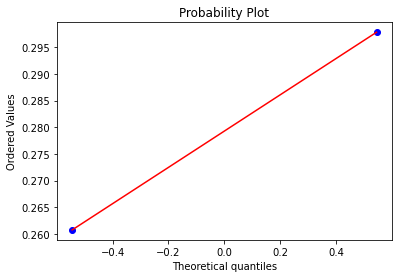

Wall time: 1.21 s


In [180]:
%%time

sb.distplot(chi.groupby('Primary Type')['Arrest'].mean())

fig = plt.figure()
res = stats.probplot(chi.groupby('Primary Type')['Arrest'].mean(), plot=plt)
plt.show()

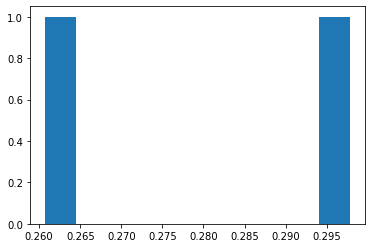

Wall time: 557 ms


In [181]:
%%time

# counts, bins = np.histogram(chi.groupby('Primary Type')['Arrest'].mean())
# plt.hist(bins[:-1], bins, weights=counts)

plt.hist(chi.groupby('Primary Type')['Arrest'].mean(), bins=10, range=None, density=False, 
         weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', 
         orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False,
         data=None)
plt.show()

# horizontal  vertical
# histtype{'bar', 'barstacked', 'step', 'stepfilled'}, default: 'bar'

In [219]:
%%time

fm1 = pd.DataFrame(chi.groupby('Primary Type')['Arrest'].mean().to_numpy(), 
                  index=['Felonies', 'Misdemeanors'],
                  columns=['Proportion of Arrests Made Since 2001'])



fm = fm1.append(fm2) #, ignore_index = True)

fm.info()
fm

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Felonies to Hypothetical Comparison Arrest Rate of 100%
Data columns (total 1 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Proportion of Arrests Made Since 2001  4 non-null      float64
dtypes: float64(1)
memory usage: 64.0+ bytes
Wall time: 410 ms


,Proportion of Arrests Made Since 2001
Felonies,0.297812
Misdemeanors,0.260760
Infractions,0.076555
Hypothetical Comparison Arrest Rate of 100%,1.000000


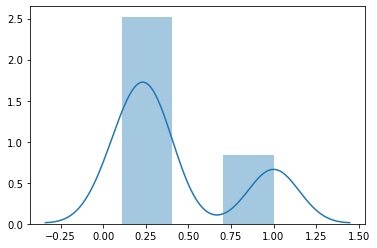

Wall time: 256 ms


In [192]:
%%time

sb.distplot(fm)

# fig = plt.figure()
# res = stats.probplot(fm, plot=plt)
plt.show()

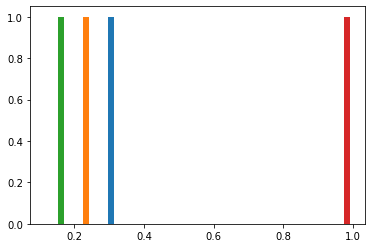

Wall time: 335 ms


In [193]:
%%time

# counts, bins = np.histogram(chi.groupby('Primary Type')['Arrest'].mean())
# plt.hist(bins[:-1], bins, weights=counts)

plt.hist(fm, bins=None, range=None, density=False, 
         weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', 
         orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False,
         data=None)
plt.show()

# horizontal  vertical
# histtype{'bar', 'barstacked', 'step', 'stepfilled'}, default: 'bar'

Wall time: 62 ms


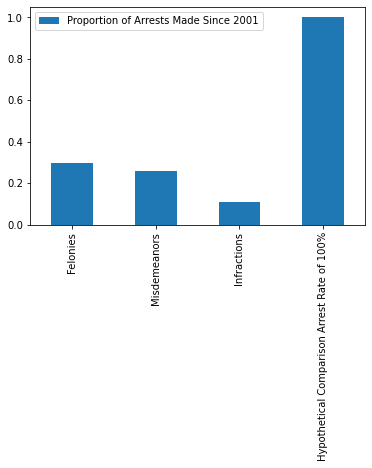

In [194]:
%%time

fm.plot(kind='bar')


Wall time: 66.9 ms


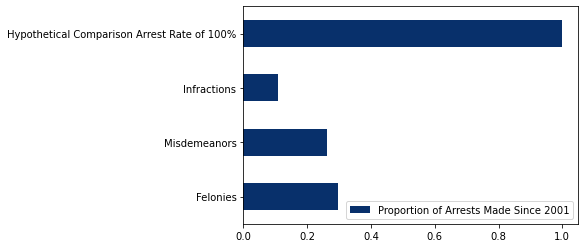

In [195]:
%%time

fm.plot(kind='barh', colormap='Blues_r')

# 'g' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r',
# 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 
# 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r',
# 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG',
# 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples',
# 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn',
# 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral',
# 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 
# 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone',
# 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 
# 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth',
# 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r',
# 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot',
# 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire',
# 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r',
# 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r',
# 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring',
# 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r',
# 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted',
# 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'


Wall time: 113 ms


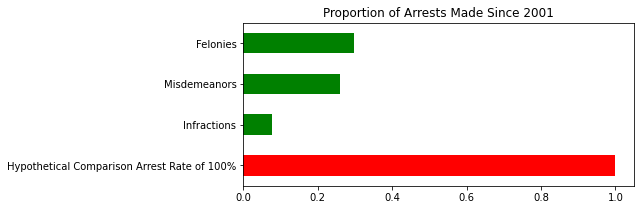

In [220]:
%%time

ax = fm['Proportion of Arrests Made Since 2001'].plot.barh(color=['g', 'g', 'g', 'r'], 
                     figsize= (7,3), title='Proportion of Arrests Made Since 2001' )  

ax.invert_yaxis()


In [16]:
%%time

chi = pd.read_csv("chi.csv")

chi.info()
chi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5755039 entries, 0 to 5755038
Data columns (total 9 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Date                  object
 1   Primary Type          object
 2   Location Description  object
 3   Arrest                bool  
 4   Beat                  int64 
 5   District              int64 
 6   Ward                  int64 
 7   Community Area        int64 
 8   Year                  int64 
dtypes: bool(1), int64(5), object(3)
memory usage: 356.7+ MB
Wall time: 10.5 s


,Date,Primary Type,Location Description,Arrest,Beat,District,Ward,Community Area,Year
0,07/26/2001 06:00:00 PM,MOTOR VEHICLE THEFT,STREET,False,723,7,16,68,2001
1,09/02/2001 06:00:00 PM,DECEPTIVE PRACTICE,PARK PROPERTY,False,932,9,16,61,2001
2,08/17/2001 05:30:00 AM,MOTOR VEHICLE THEFT,STREET,False,821,8,14,58,2001
3,07/09/2001 04:30:00 PM,DECEPTIVE PRACTICE,CURRENCY EXCHANGE,True,1623,16,45,11,2001
4,08/15/2001 11:30:00 PM,BURGLARY,RESTAURANT,True,1925,19,46,6,2001
...,...,...,...,...,...,...,...,...,...
5755034,01/18/2021 05:45:00 PM,DECEPTIVE PRACTICE,RESIDENCE,False,1111,11,37,23,2021
5755035,01/18/2021 10:17:00 AM,THEFT,OTHER (SPECIFY),False,2221,22,21,73,2021
5755036,01/18/2021 09:30:00 PM,ROBBERY,SIDEWALK,False,1211,12,1,24,2021
5755037,01/18/2021 01:04:00 AM,OTHER OFFENSE,STREET,True,131,1,3,33,2021


In [17]:
%%time

chi.info()
chi.pop('Date')
chi.pop('Location Description')
chi.pop('District')
chi.pop('Ward')
chi.pop('Community Area')
chi.pop('Year')

chi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5755039 entries, 0 to 5755038
Data columns (total 9 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Date                  object
 1   Primary Type          object
 2   Location Description  object
 3   Arrest                bool  
 4   Beat                  int64 
 5   District              int64 
 6   Ward                  int64 
 7   Community Area        int64 
 8   Year                  int64 
dtypes: bool(1), int64(5), object(3)
memory usage: 356.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5755039 entries, 0 to 5755038
Data columns (total 3 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   Primary Type  object
 1   Arrest        bool  
 2   Beat          int64 
dtypes: bool(1), int64(1), object(1)
memory usage: 93.3+ MB
Wall time: 485 ms


In [18]:
%%time

print(chi['Primary Type'].unique())
print(chi.nunique())

['MOTOR VEHICLE THEFT' 'DECEPTIVE PRACTICE' 'BURGLARY' 'HOMICIDE'
 'SEX OFFENSE' 'OFFENSE INVOLVING CHILDREN' 'CRIMINAL TRESPASS' 'BATTERY'
 'ROBBERY' 'THEFT' 'CRIM SEXUAL ASSAULT' 'OTHER OFFENSE' 'CRIMINAL DAMAGE'
 'ASSAULT' 'INTIMIDATION' 'WEAPONS VIOLATION' 'ARSON'
 'PUBLIC PEACE VIOLATION' 'CRIMINAL SEXUAL ASSAULT' 'NARCOTICS'
 'PROSTITUTION' 'LIQUOR LAW VIOLATION' 'GAMBLING' 'KIDNAPPING'
 'INTERFERENCE WITH PUBLIC OFFICER' 'STALKING' 'RITUALISM' 'OBSCENITY'
 'PUBLIC INDECENCY' 'OTHER NARCOTIC VIOLATION' 'NON-CRIMINAL'
 'NON-CRIMINAL (SUBJECT SPECIFIED)' 'HUMAN TRAFFICKING' 'NON - CRIMINAL'
 'CONCEALED CARRY LICENSE VIOLATION']
Primary Type     35
Arrest            2
Beat            303
dtype: int64
Wall time: 2.09 s


In [19]:
%%time

print(chi['Arrest'].unique())

chi['Arrest'] = chi['Arrest'].astype(int)

print(chi['Arrest'].unique())
print(chi.nunique())
print(chi.info())

[False  True]
[0 1]
Primary Type     35
Arrest            2
Beat            303
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5755039 entries, 0 to 5755038
Data columns (total 3 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   Primary Type  object
 1   Arrest        int32 
 2   Beat          int64 
dtypes: int32(1), int64(1), object(1)
memory usage: 109.8+ MB
None
Wall time: 2.03 s


In [20]:

%%time

chi.groupby('Primary Type')['Arrest'].mean()


Wall time: 903 ms


Primary Type
ARSON                                0.105640
ASSAULT                              0.234022
BATTERY                              0.226699
BURGLARY                             0.055886
CONCEALED CARRY LICENSE VIOLATION    0.966667
CRIM SEXUAL ASSAULT                  0.136124
CRIMINAL DAMAGE                      0.062685
CRIMINAL SEXUAL ASSAULT              0.064276
CRIMINAL TRESPASS                    0.724931
DECEPTIVE PRACTICE                   0.141551
GAMBLING                             0.992500
HOMICIDE                             0.430506
HUMAN TRAFFICKING                    0.093750
INTERFERENCE WITH PUBLIC OFFICER     0.925858
INTIMIDATION                         0.160803
KIDNAPPING                           0.105942
LIQUOR LAW VIOLATION                 0.990114
MOTOR VEHICLE THEFT                  0.084038
NARCOTICS                            0.993846
NON - CRIMINAL                       0.157895
NON-CRIMINAL                         0.058480
NON-CRIMINAL (SUBJECT

In [21]:
%%time

crimes = pd.DataFrame(chi.groupby('Primary Type')['Arrest'].mean().to_numpy(), 
                  index=['ARSON',
                        'ASSAULT',                             
                        'BATTERY',                              
                        'BURGLARY',                            
                        'CONCEALED CARRY LICENSE VIOLATION',   
                        'CRIM SEXUAL ASSAULT',                  
                        'CRIMINAL DAMAGE',                  
                        'CRIMINAL SEXUAL ASSAULT',           
                        'CRIMINAL TRESPASS',                   
                        'DECEPTIVE PRACTICE',                  
                        'GAMBLING',                             
                        'HOMICIDE',                           
                        'HUMAN TRAFFICKING',                    
                        'INTERFERENCE WITH PUBLIC OFFICER',    
                        'INTIMIDATION',                        
                        'KIDNAPPING',                           
                        'LIQUOR LAW VIOLATION',                
                        'MOTOR VEHICLE THEFT',                  
                        'NARCOTICS',                            
                        'NON - CRIMINAL',                       
                        'NON-CRIMINAL',                         
                        'NON-CRIMINAL (SUBJECT SPECIFIED)',     
                        'OBSCENITY',                            
                        'OFFENSE INVOLVING CHILDREN',           
                        'OTHER NARCOTIC VIOLATION',             
                        'OTHER OFFENSE',                        
                        'PROSTITUTION',                         
                        'PUBLIC INDECENCY',                     
                        'PUBLIC PEACE VIOLATION',               
                        'RITUALISM',                            
                        'ROBBERY',                              
                        'SEX OFFENSE',                          
                        'STALKING',                             
                        'THEFT',                                
                        'WEAPONS VIOLATION'],
                        columns=['Proportion of Arrests Made Since 2001'])
display(crimes.info())
display(crimes.nunique())
crimes

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, ARSON to WEAPONS VIOLATION
Data columns (total 1 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Proportion of Arrests Made Since 2001  35 non-null     float64
dtypes: float64(1)
memory usage: 560.0+ bytes


None

Proportion of Arrests Made Since 2001    35
dtype: int64

Wall time: 859 ms


,Proportion of Arrests Made Since 2001
ARSON,0.105640
ASSAULT,0.234022
BATTERY,0.226699
BURGLARY,0.055886
CONCEALED CARRY LICENSE VIOLATION,0.966667
CRIM SEXUAL ASSAULT,0.136124
CRIMINAL DAMAGE,0.062685
CRIMINAL SEXUAL ASSAULT,0.064276
CRIMINAL TRESPASS,0.724931
DECEPTIVE PRACTICE,0.141551


In [22]:
%%time

crimes.info()
crimes = crimes.drop(index=['CRIM SEXUAL ASSAULT',
                    'CRIMINAL SEXUAL ASSAULT',
                    'NON - CRIMINAL',
                    'NON-CRIMINAL',
                    'NON-CRIMINAL (SUBJECT SPECIFIED)',
                    'OFFENSE INVOLVING CHILDREN',
                    'OTHER OFFENSE',
                    'PROSTITUTION',
                    'SEX OFFENSE'])
crimes.info()
crimes

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, ARSON to WEAPONS VIOLATION
Data columns (total 1 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Proportion of Arrests Made Since 2001  35 non-null     float64
dtypes: float64(1)
memory usage: 560.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, ARSON to WEAPONS VIOLATION
Data columns (total 1 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Proportion of Arrests Made Since 2001  26 non-null     float64
dtypes: float64(1)
memory usage: 416.0+ bytes
Wall time: 31 ms


,Proportion of Arrests Made Since 2001
ARSON,0.105640
ASSAULT,0.234022
BATTERY,0.226699
BURGLARY,0.055886
CONCEALED CARRY LICENSE VIOLATION,0.966667
CRIMINAL DAMAGE,0.062685
CRIMINAL TRESPASS,0.724931
DECEPTIVE PRACTICE,0.141551
GAMBLING,0.992500
HOMICIDE,0.430506


Wall time: 192 ms


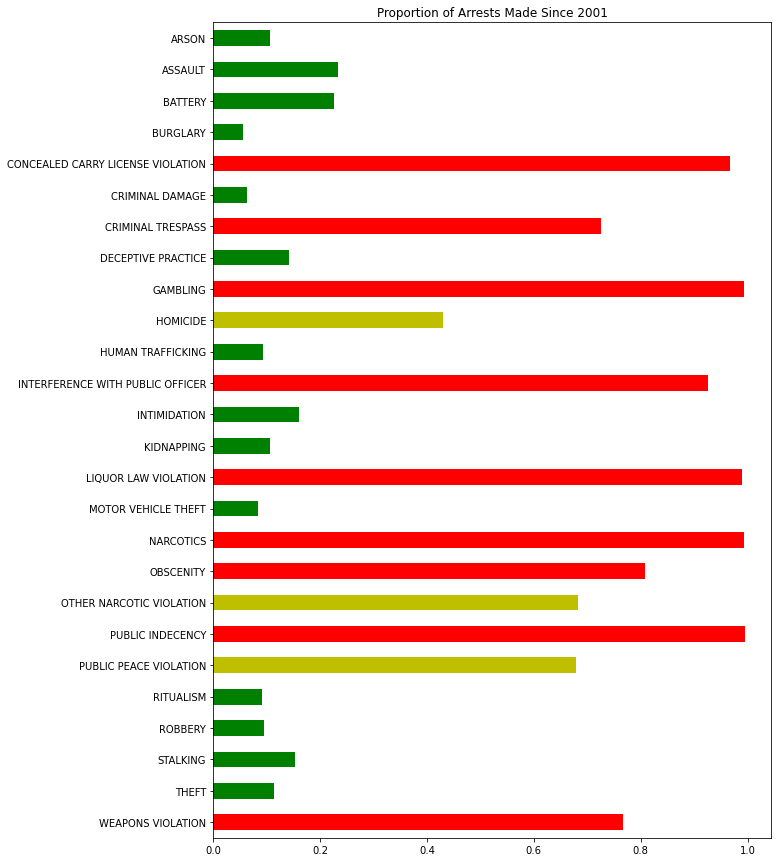

In [146]:
%%time

ax = crimes['Proportion of Arrests Made Since 2001'].plot.barh(color=['g', 'g', 'g', 'g', 'r', 'g',
                                                                      'r', 'g', 'r', 'y', 'g', 'r', 
                                                                      'g', 'g', 'r', 'g', 'r', 'r', 
                                                                      'y', 'r', 'y', 'g', 'g', 'g', 
                                                                      'g', 'r'], figsize=(10,15),
                                                     title='Proportion of Arrests Made Since 2001')

ax.invert_yaxis()


In [39]:
%%time

# NON-CRIMINAL (SUBJECT SPECIFIED)     1.000000

# 'Primary Type'  get_grouper(obj, key, axis, level, sort, observed, mutated, validate)
# gk = df.groupby('Column')    gk.get_group('Index')

# gk = chi.groupby('Primary Type')    
# display(gk.get_group('NON-CRIMINAL (SUBJECT SPECIFIED)'))
# display(gk.get_group('NON-CRIMINAL (SUBJECT SPECIFIED)')['Arrest'].mean())


# df2 = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
#                    columns=['a', 'b', 'c'])
# df2
#    a  b  c
# 0  1  2  3
# 1  4  5  6
# 2  7  8  9


preds = pd.DataFrame(np.array([[0.71972407, 0.71951059, 0.87696256], 
                               [0.71972407, 0.71972407, 0.87687094], 
                               [0.71972407, 0.71951059, 0.87721079], 
                               [0.72389355, 0.83399834, 0.87738924], 
                               [0.73177857, 0.87674797, 0.87737137], 
                               [0.72459681, 0.87751612, 0.87795796], 
                               [0.8679015963798768, 0.8679234771281876, 0.8679577328381378]]), 
                                          
                              columns=['Run 1','Run 2','Run 3'],
                     
                              index=['NB Scores:','LGR Scores:','RDG Scores:',
                                     'RF Scores:','BG Scores:','DT Scores:','MLP Scores:'])

preds.info()
preds


# fm1 = pd.DataFrame(chi.groupby('Primary Type')['Arrest'].mean().to_numpy(), 
#                   index=['Felonies', 'Misdemeanors'],
#                   columns=['Proportion of Arrests Made Since 2001'])

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, NB Scores: to MLP Scores:
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run 1   7 non-null      float64
 1   Run 2   7 non-null      float64
 2   Run 3   7 non-null      float64
dtypes: float64(3)
memory usage: 224.0+ bytes
Wall time: 214 ms


,Run 1,Run 2,Run 3
NB Scores:,0.719724,0.719511,0.876963
LGR Scores:,0.719724,0.719724,0.876871
RDG Scores:,0.719724,0.719511,0.877211
RF Scores:,0.723894,0.833998,0.877389
BG Scores:,0.731779,0.876748,0.877371
DT Scores:,0.724597,0.877516,0.877958
MLP Scores:,0.867902,0.867923,0.867958


Wall time: 99.9 ms


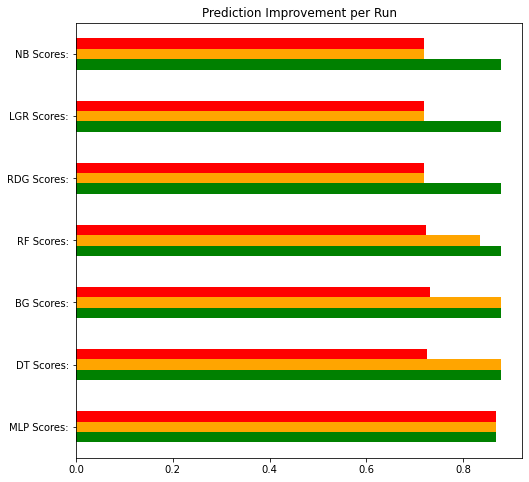

In [130]:
%%time

ax = preds[['Run 1','Run 2','Run 3']].plot.barh(color={'Run 1':'r','Run 2':'orange','Run 3':'g'},
                                                legend=False, figsize=(8,8),
                                                title='Prediction Improvement per Run')

ax.invert_yaxis()

Wall time: 745 ms


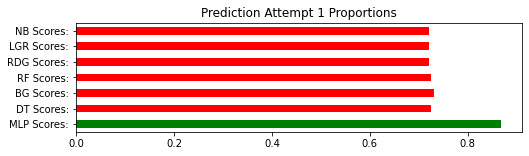

In [143]:
%%time

ax = preds['Run 1'].plot.barh(color=['r', 'r', 'r', 'r', 'r', 'r', 'g',],
                                    figsize=(8,2), title='Prediction Attempt 1 Proportions')

ax.invert_yaxis()

Wall time: 89.5 ms


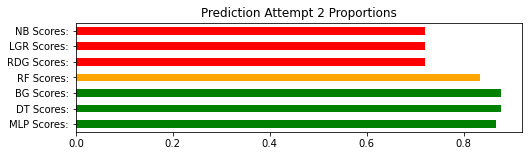

In [144]:
%%time

ax = preds['Run 2'].plot.barh(color=['r', 'r', 'r', 'orange', 'g', 'g', 'g',],
                                     figsize=(8,2), title='Prediction Attempt 2 Proportions')

ax.invert_yaxis()

Wall time: 86.5 ms


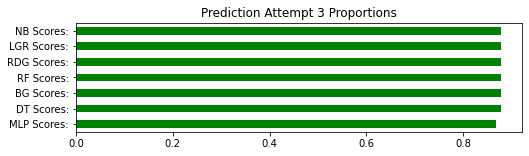

In [145]:
%%time

ax = preds['Run 3'].plot.barh(color=['g', 'g', 'g', 'g', 'g', 'g', 'g',],
                                     figsize=(8,2), title='Prediction Attempt 3 Proportions')

ax.invert_yaxis()